In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

house = pd.read_csv("house_price.csv")
house


,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000
...,...,...,...,...,...,...,...
995,Bommanahalli,3,1,1460,1,2,25000
996,Whitefield,3,0,2100,1,7,28000
997,Bommanahalli,2,0,1033,5,0,16500
998,Bommanahalli,3,0,1500,10,1,22000


In [3]:
# house.info()
# (house["Sq_ft"]>=2000).value_counts()
house.rename(columns = {'Sq.ft':'Sq_ft'},inplace = True)
house.rename(columns = {'Old(years)':'Old'},inplace = True)
house.Sq_ft.describe()

count    1000.000000
mean     1448.613000
std       491.272535
min       767.000000
25%      1089.000000
50%      1300.000000
75%      1650.000000
max      3155.000000
Name: Sq_ft, dtype: float64

In [9]:
# house.Old.describe()

# dummies = pd.get_dummies(house.Location)

# house = pd.concat([dummies,house],axis = 'columns')

# house.drop(['Location'],axis = 'columns' ,inplace =True)

house

,Bommanahalli,Whitefield,BHK,Furnishing,Sq_ft,Old,Floor,Price
0,1,0,3,1,3000,1,3,28000
1,1,0,3,1,1650,10,0,18000
2,0,1,2,0,1000,5,3,16400
3,0,1,3,0,1600,1,9,27000
4,0,1,2,1,1200,5,1,20000
...,...,...,...,...,...,...,...,...
995,1,0,3,1,1460,1,2,25000
996,0,1,3,0,2100,1,7,28000
997,1,0,2,0,1033,5,0,16500
998,1,0,3,0,1500,10,1,22000


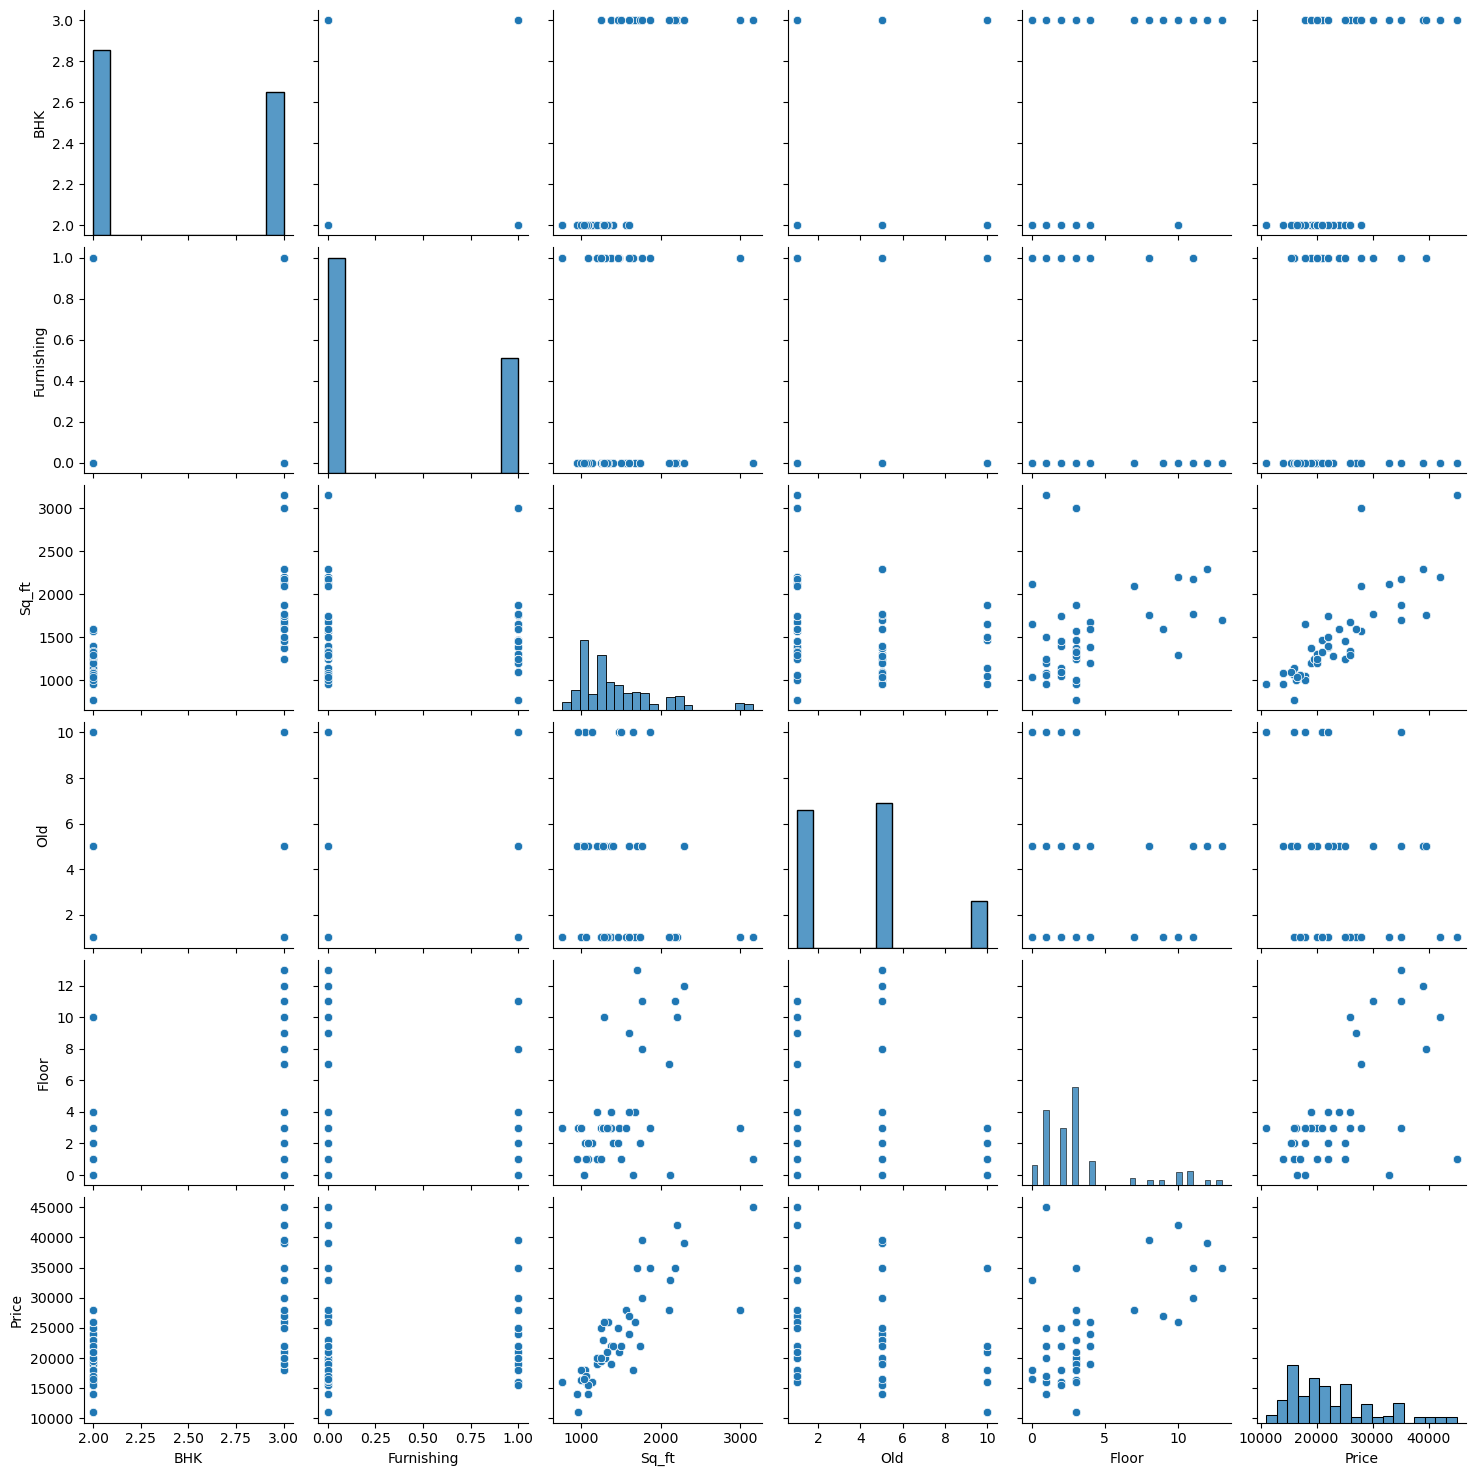

In [5]:
sns.pairplot(house)


In [6]:
sns.heatmap(house.corr(),annot=True)

<AxesSubplot:>

In [7]:
#house[house.Sq_ft/house.BHK > 100].head()

In [10]:
x = house[['Bommanahalli', 'Whitefield', 'BHK', 'Furnishing', 'Sq_ft', 'Old',
       'Floor']]

y = house['Price']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train,y_train)

LinearRegression()

In [16]:
predictions = lm.predict(x_test)

In [17]:
plt.scatter(y_test,predictions)
plt.title('Prices Vs All Columns')
plt.xlabel('Bommanahalli , Whitefield , BHK , Furnishing , Sq_ft , Old , Floor')
plt.ylabel('Prices')

Text(50.581597222222214, 0.5, 'Prices')

In [31]:
from sklearn.metrics import r2_score
res = round(r2_score(y_test,predictions)*100,1)
print(str(res) + "%")

85.3%
